*La base des TPs pour le cours "Classification des données" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, auteur Yury Kashnitsky)*



# <center> TP 2 : Les methodes de régression et classification

Dans ce TP, vous allez découvrir le fonctionnement d'un arbre de décision, aussi que de la méthode KNN etc., dans les tâches de régression et classification sur les données synthétiques et MNIST.

**Votre travail consiste à écrire du code et effectuer des calculs dans les cellules ci-dessous.**

Tout d'abord, nous allons initialiser l'environnement, importons tout les bibliothèques nécessaires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()

from IPython.display import Image
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler

## 1. Arbres de décision et KNN methode pour la régression : données synthétiques

Considérons le problème de régression unidimensionnel suivant. Nous devons créer une fonction $\large a(x)$ pour approximer la dépendance $\large y = f(x) = x^3 $ en utilisant le critère d'erreur quadratique moyen: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

Créons une fonction de génération des données (sur l'intervalle [-3,3]) avec le bruit normal de 40% pour ce problème.

In [38]:
n_train = 100        
n_test = 100     
noise = 0.4

def generate(n_samples, noise):
  X = np.linspace(-3,3,n_samples)
  y = X ** 3 + np.random.normal(0.0, noise, n_samples) 
  X = X.reshape((n_samples, 1))
  
  return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

**Ex. 1** : Créez un arbre de decision de la classe [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), entraînez le sur données {X_train, y_train} et visualisez les prédictions qu’il réalise. Affichez votre l'erreur quadratique moyenne (MSE) obtenue sur les données de test {X_test, y_test}.


MSE :  0.2662


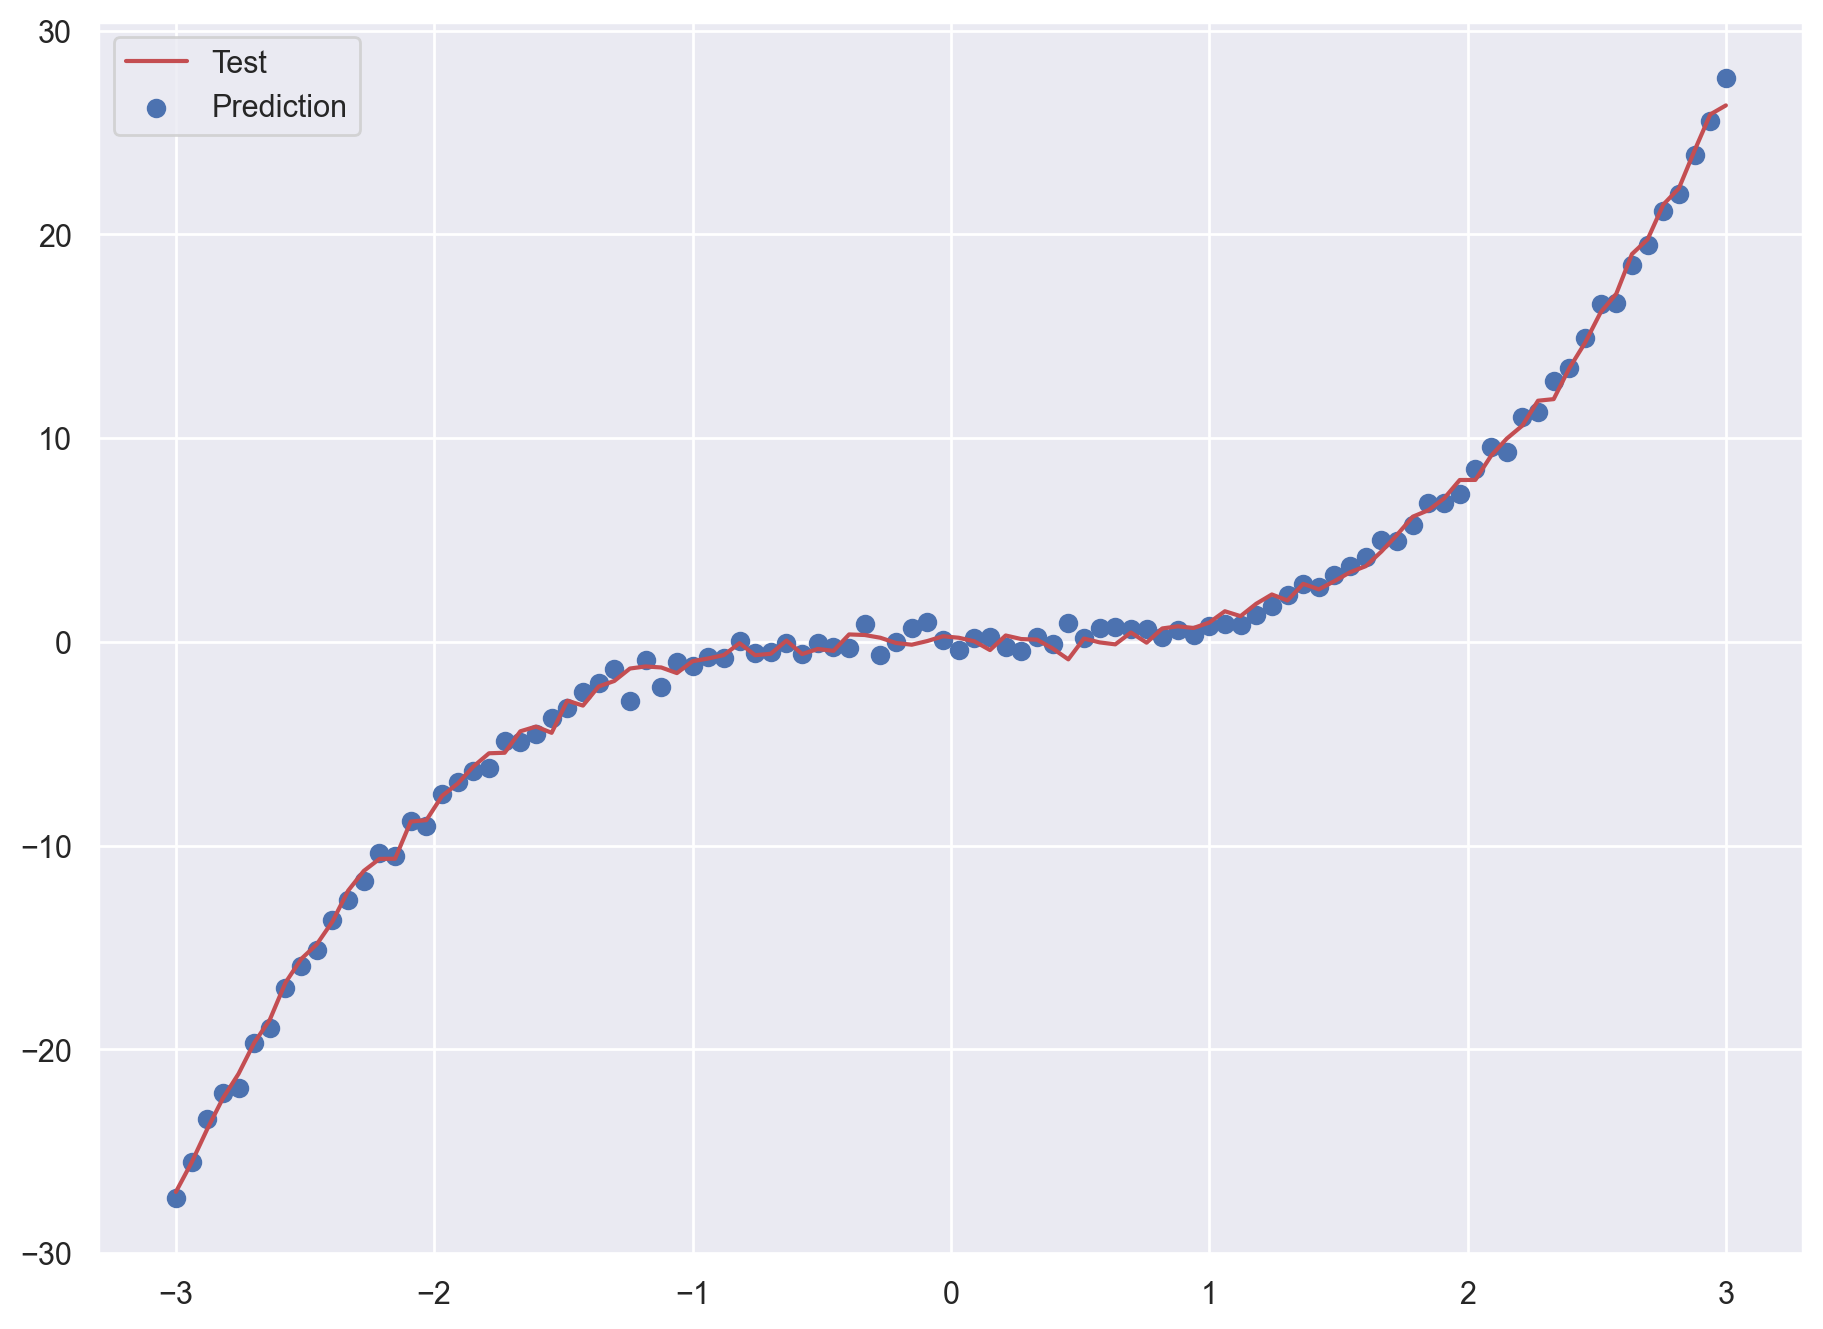

In [39]:
# You code here
from turtle import color, title
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

pmodel=DecisionTreeRegressor(random_state=1)
pmodel.fit(X_train,y_train)
y_pred_pmodel=pmodel.predict(X_test)
print('MSE : ',round(mean_squared_error(y_test, y_pred_pmodel), 4))
plt.plot(X_test, y_test, label='Test', color='r')

plt.scatter(X_test, y_pred_pmodel, label='Prediction')
plt.legend()



**Ex. 2** : Appliquez la méthode des plus proches voisins (KNN) de la classe [`sklearn.neighbors.KNeighborsRegressor`]( https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) à ce problème de régression, entraînez le sur données {X_train, y_train} et visualisez les prédictions qu’il réalise. Affichez votre l'erreur quadratique moyenne (MSE) obtenue sur les données de test {X_test, y_test}.

MSE   :    0.1754


<function matplotlib.pyplot.show(close=None, block=None)>

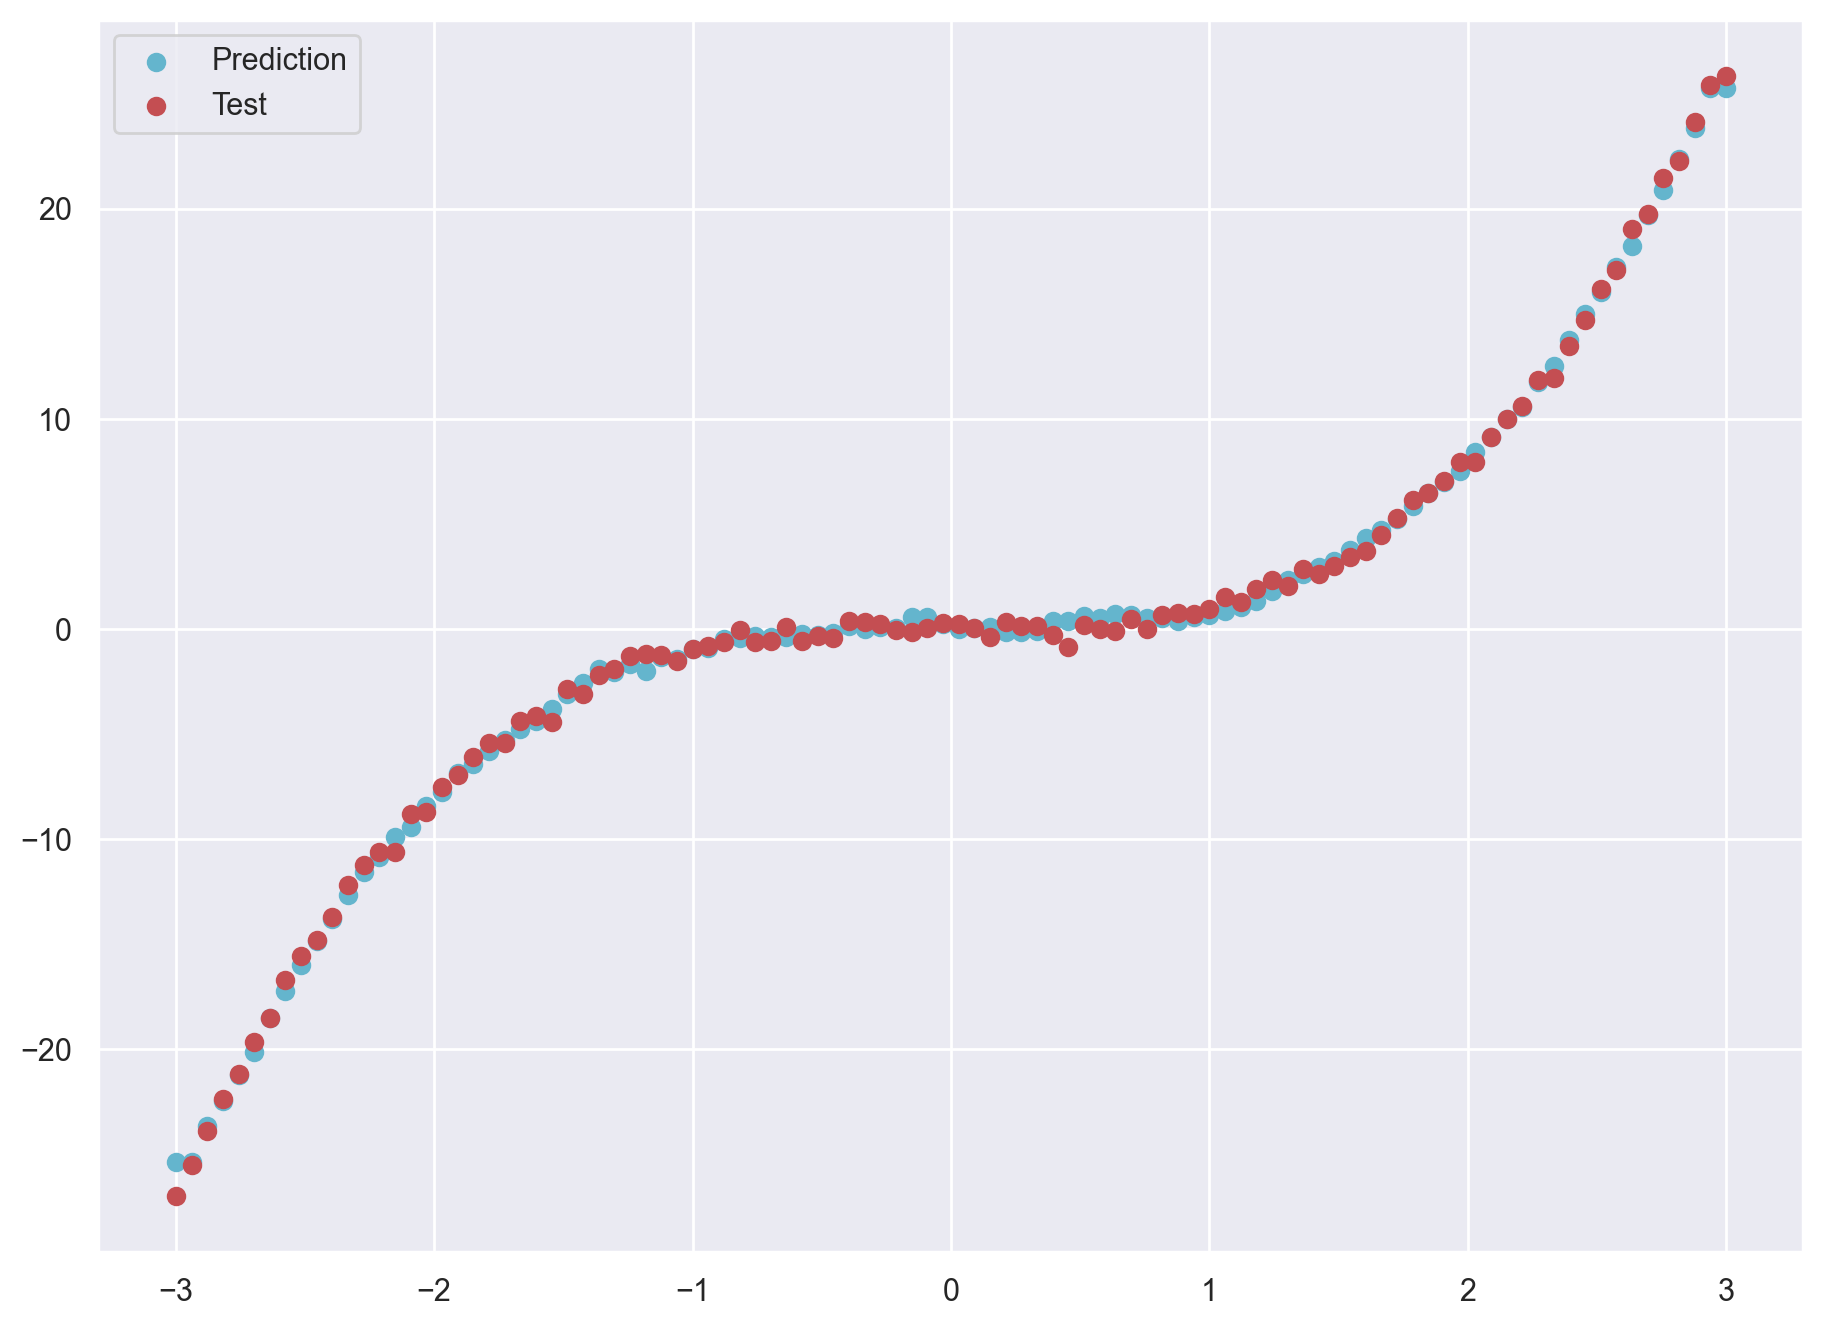

In [40]:
# You code here
from sklearn.neighbors import KNeighborsRegressor
dmodel=KNeighborsRegressor(n_neighbors=3)
dmodel.fit(X_train, y_train)
y_pred_dmodel=dmodel.predict(X_test)
print('MSE   :   ', round(mean_squared_error(y_test, y_pred_dmodel),4))

plt.scatter(X_test, y_pred_dmodel,label='Prediction', color='c')
plt.scatter(X_test, y_test, label='Test', color='r')
plt.legend()
plt.show


## 2. Arbres de décision, k-NN et Forêt aléatoire dans une tâche de reconnaissance manuscrite de chiffres du MNIST

Voyons maintenant comment ces 3 algorithmes fonctionnent sur une tâche tirée du monde réel. Nous allons utiliser le jeu de données intégré dans `sklearn` sur des chiffres manuscrits. Cette tâche est un exemple où k-NN fonctionne étonnamment bien.
 
Les images sont des matrices 8x8 (intensité de la couleur blanche pour chaque pixel). Ensuite, chacune de ces matrices est "unfolded" (étalée, dépliée) en un vecteur de longueur 64 et nous obtenons une description des caractéristiques d'un objet.
 
Affichons quelques chiffres manuscrits. Nous voyons que l'on peut les distinguer.

In [108]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

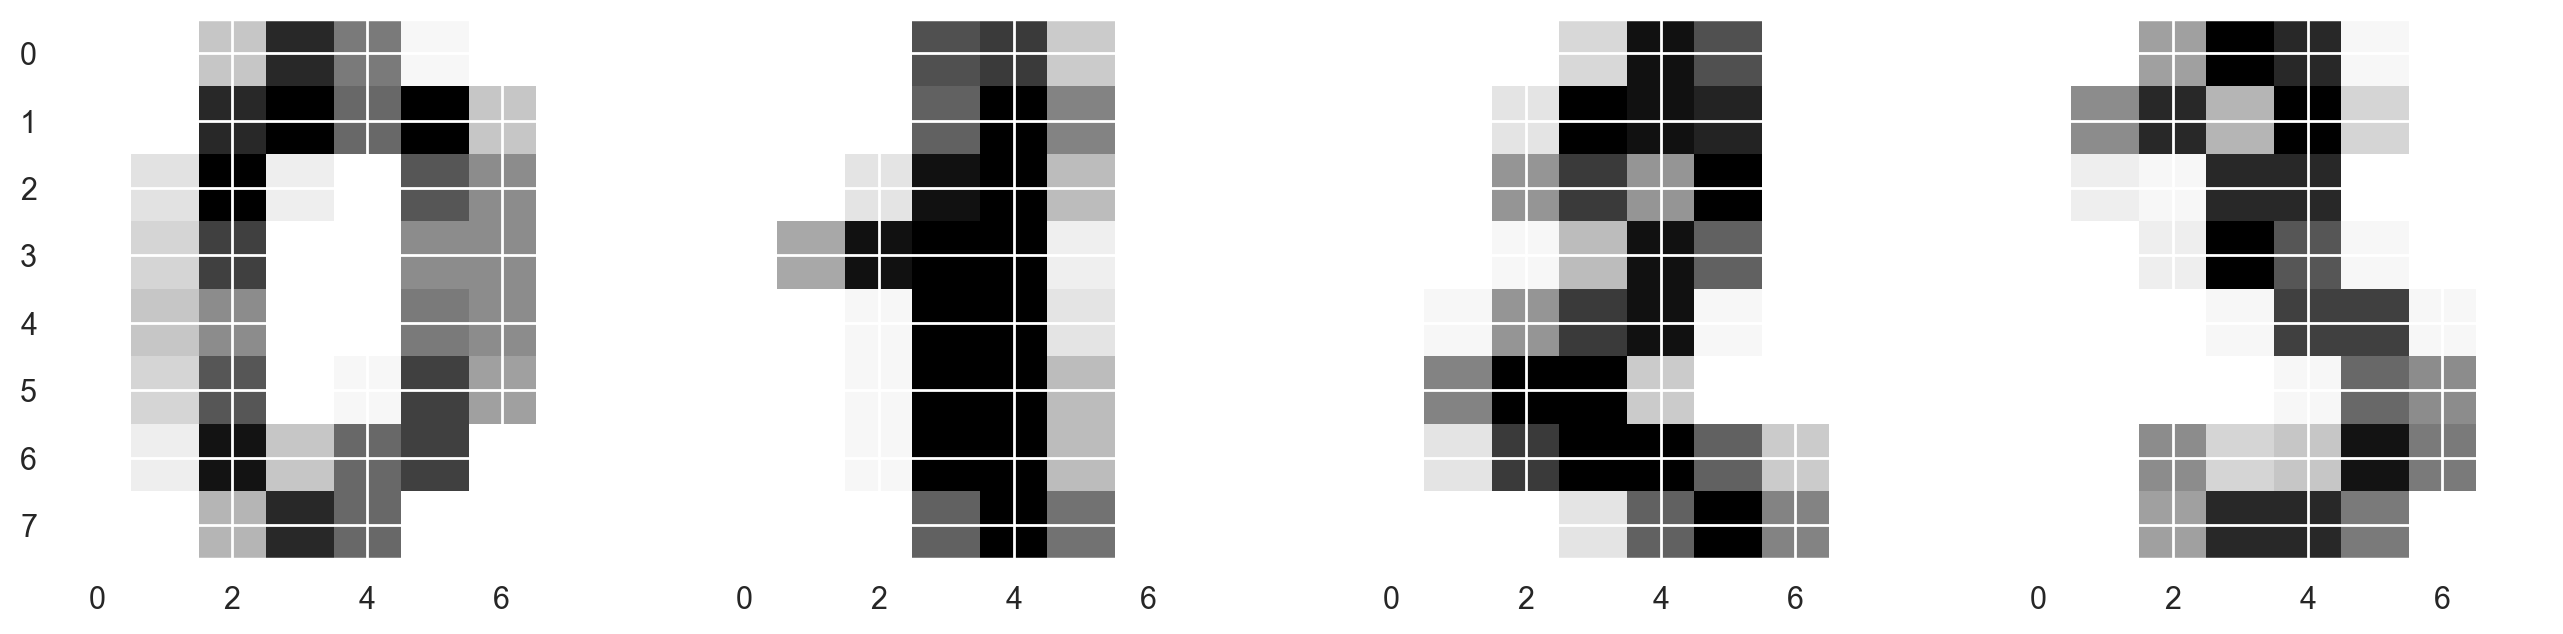

In [109]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

**Ex. 3** : Séparez les données MNIST en *train* (70%) et *test* (30%) sous-ensemble des données (en utilisant [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [110]:
# You code here
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, train_size=0.7)

**Ex. 4,5,6** : Appliquez les Arbres de décision ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)), k-NN ([`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) et Forêt aléatoire ([`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) avec les paramètres par défaut sur les données MNIST séparées. 

Affichez les résultats obtenus sur les données de *test*.

In [70]:
# You code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [71]:
model_1=RandomForestClassifier(random_state=1)
model_2=DecisionTreeClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=5)
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

y_pred_model1=model_1.predict(X_test)
y_pred_model2=model_2.predict(X_test)
y_pred_model3=model_3.predict(X_test)


In [73]:
y_pred_model1.shape, X_test.shape

((540,), (540, 64))

In [72]:
print('MSE RandomForest : ', round(mean_squared_error(y_test,y_pred_model1),4))
print('MSE DecisionTree : ', round(mean_squared_error(y_test,y_pred_model2),4))
print('MSE KNeighbors : ', round(mean_squared_error(y_test,y_pred_model3),4))

MSE RandomForest :  0.5556
MSE DecisionTree :  2.4296
MSE KNeighbors :  0.25


**Ex. 7,8,9** : Optimisez les paramètres des 3 méthodes en utilisant la validation croisée (sur les données de *train*), [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

Affichez les résultats obtenus sur les données de *test*.

In [87]:
# You code here
search_space={
    'n_estimators':[100,200,300],
    'max_depth': [3,4,5],
    'criterion':['gini', 'entropy', 'log_loss']
}
model11=GridSearchCV(model_1, search_space, cv=5, n_jobs=1, verbose=True)
model11.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [94]:
param_model_1=model11.best_params_


In [97]:
search_space2={
    'min_samples_split':[1,2,3],
    'max_depth': [3,4,5],
    'criterion':['gini', 'entropy', 'log_loss']
}
model22=GridSearchCV(model_2, search_space2, cv=5, n_jobs=1, verbose=True)
model22.fit(X_train, y_train)
param_model_2=model22.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

In [99]:
search_space3={
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': [3,4,5],
    'p':[1,2,3]
}
model33=GridSearchCV(model_3, search_space3, cv=5, n_jobs=1, verbose=True)
model33.fit(X_train, y_train)
param_model_3=model33.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [112]:
model11.score(X_test,y_test)

0.9611111111111111

**Ex. 10** : Organisez les résultats obtenus dans les ex.8-9 sous forme d'un tableau (lignes : DT, KNN, RF; colonnes : Holdout, CV).

In [ ]:
# You code here
data=pd.DataFrame({'Holdout': ['Par defaut','Par defaut','Par defaut'],'CV' : []})